<a href="https://colab.research.google.com/github/Forrestjohnson2000/6162-Seabreeze/blob/main/Src/Sea_Breeze_Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sea Breeze Support Vector Machine


## Preprocessing for an SVM Model

In [ ]:
#Immport libraries
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, r2_score, mean_squared_error

In [ ]:
#Read csv
df = pd.read_csv("https://raw.githubusercontent.com/Forrestjohnson2000/6162-Seabreeze/main/Data/prepped_data.csv")
df = df.drop(["Unnamed: 0", 'date', 'hour'], axis=1)
df

,drct,sped,WDIR,WSPD,PRES,WTMP,SBI,AttackCat
0,67.500000,8.0500,250.0,4.0,1017.408303,21.836225,4.547025,0.0
1,22.500000,2.0125,80.0,5.0,1017.408303,21.836225,6.092861,0.0
2,25.000000,8.3375,50.0,6.0,1017.408303,21.836225,7.273592,0.0
3,0.000000,0.0000,350.0,5.0,1017.408303,21.836225,5.821537,0.0
4,25.000000,9.4875,50.0,8.0,1017.408303,21.836225,6.718124,0.0
...,...,...,...,...,...,...,...,...
3166,32.500000,6.3250,38.0,6.6,1032.100000,13.900000,4.738069,0.0
3167,250.000000,11.7875,269.0,0.8,1025.500000,13.900000,3.090149,0.0
3168,48.792615,6.3250,270.0,1.8,1021.500000,14.400000,5.244294,0.0
3169,222.500000,12.3625,225.0,8.3,1012.900000,14.300000,3.314484,0.0


In [ ]:
#Define X and y
y = df['AttackCat']
X = df.drop(["AttackCat"], axis=1)

The data needs to be scaled for an SVM model.

In [ ]:
#Scaling numeric inputs
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X
X = pd.DataFrame(ss.fit_transform(X), columns = X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=.8)

## Create SVM Model Baseline

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

## Evaluate Baseline

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("ROC AUC score: ", roc_auc_score(y_test, y_pred))

Accuracy: 0.9700787401574803
ROC AUC score:  0.5


In [ ]:
score_baseline = clf.score(X_test, y_test)

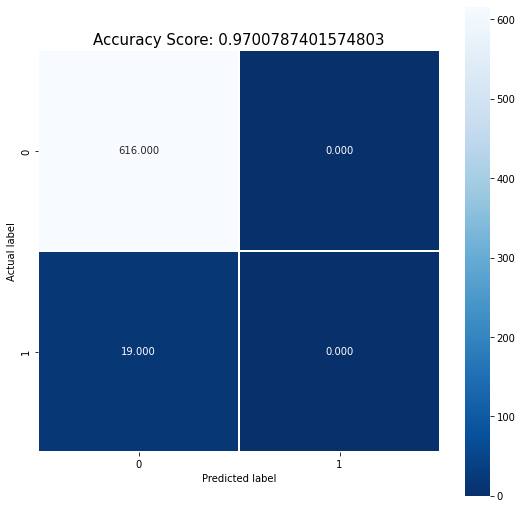

In [ ]:
import seaborn as sns
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_baseline)
plt.title(all_sample_title, size = 15);

We can see from the confusion matrix above that the baseline model predicts all 0s. This is because the data is imbalanced, with the vast majority of observations having an AttackCat of 0. This model has an accuracy of 0.97, but it has an auc of 0.5, which confirms that we should try resampling the data.

## Dealing with Imbalanced Data

We can try several strategies to deal with the imbalanced data, including undersampling, oversampling with SMOTE, and a combination of both.

In [ ]:
print(df['AttackCat'].value_counts())

0.0    3076
1.0      95
Name: AttackCat, dtype: int64


### Undersampling

In [ ]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
# summarize class distribution
print("Before undersampling: ", Counter(y_train))

Before undersampling:  Counter({0.0: 2460, 1.0: 76})


In [ ]:
# define undersampling strategy
undersample = RandomUnderSampler(sampling_strategy='majority', random_state=101)

In [ ]:
# fit and apply the transform
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

In [ ]:
# summarize class distribution
print("After undersampling: ", Counter(y_train_under))

After undersampling:  Counter({0.0: 76, 1.0: 76})


In [ ]:
#Train the model using the training sets
clf_under = clf.fit(X_train_under, y_train_under)

#Predict the response for test dataset
y_pred_under = clf_under.predict(X_test)

In [ ]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_under))
print("ROC AUC score for undersampled data: ", roc_auc_score(y_test, y_pred_under))

Accuracy: 0.658267716535433
ROC AUC score for undersampled data:  0.7728554340396445


In [ ]:
score_under = clf_under.score(X_test, y_test)

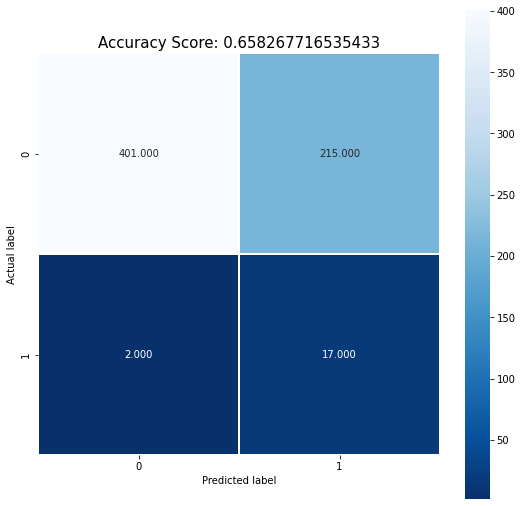

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred_under)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_under)
plt.title(all_sample_title, size = 15);

This model is much better than the previous model, as we can see that it does predict some 1s for AttackCat. This model has an accuracy of 0.66 and an auc of 0.77.

### Oversampling with SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# summarize class distribution
print("Before oversampling: ",Counter(y_train))

Before oversampling:  Counter({0.0: 2460, 1.0: 76})


In [ ]:
# define oversampling strategy
SMOTE_model = SMOTE(random_state=101)

In [ ]:
# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE_model.fit_resample(X_train, y_train)

In [ ]:
# summarize class distribution
print("After oversampling: ",Counter(y_train_SMOTE))

After oversampling:  Counter({0.0: 2460, 1.0: 2460})


In [ ]:
clf_SMOTE = clf.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_SMOTE = clf_SMOTE.predict(X_test)

In [ ]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_SMOTE))
print("ROC AUC score for oversampled data: ", roc_auc_score(y_test, y_pred_SMOTE))

Accuracy: 0.6614173228346457
ROC AUC score for oversampled data:  0.7234706083390294


In [ ]:
score_over = clf_SMOTE.score(X_test, y_test)

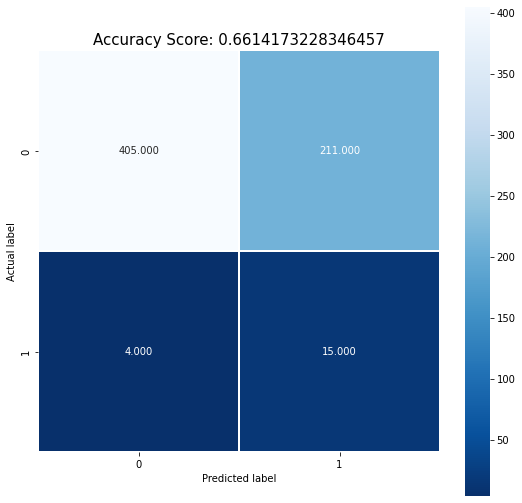

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred_SMOTE)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_over)
plt.title(all_sample_title, size = 15);

This model is also much better than the baseline. With an accuracy of 0.66 and an auc of 0.72, it is fairly comparable to the undersampling method. 

### Combination of Under- and Oversampling using Pipeline

In [ ]:
from imblearn.pipeline import Pipeline

In [ ]:
model = clf
over = SMOTE(sampling_strategy=0.3, random_state=101)
under = RandomUnderSampler(sampling_strategy=0.7, random_state=101)
steps = [('o', over), ('u', under), ('model', model)]
pipeline = Pipeline(steps=steps)

In [ ]:
pipeline.fit(X_train, y_train)
y_pred_pipeline = pipeline.predict(X_test)

In [ ]:
from numpy import mean

In [ ]:
# evaluate pipeline
accuracy_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=5, n_jobs=-1)
accuracy_score = mean(accuracy_scores)
roc_scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=5, n_jobs=-1)
roc_score = mean(roc_scores)
print('Accuracy score for the combined method: %.3f' % accuracy_score)
print('ROC AUC score for the combined sampling method: %.3f' % roc_score)

Accuracy score for the combined method: 0.783
ROC AUC score for the combined sampling method: 0.781


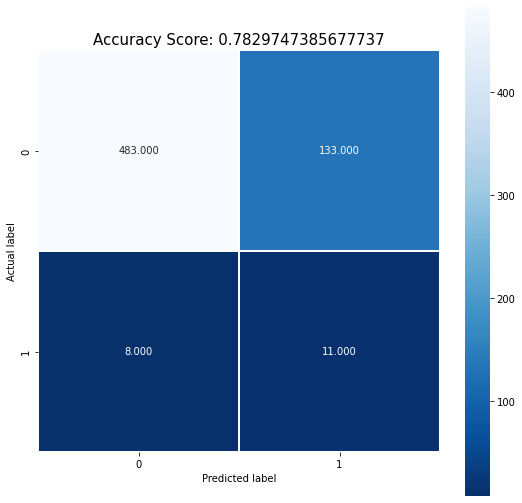

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred_pipeline)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score)
plt.title(all_sample_title, size = 15);

This model is the best yet, with an accuracy of 0.78 and an auc of 0.78. 

### Find Best Sampling Ratio

In [ ]:
over_values = [0.3,0.4,0.5]
under_values = [0.7,0.6,0.5]
for o in over_values:
  for u in under_values:
    # define pipeline
    model_pipeline = clf
    over_pipeline = SMOTE(sampling_strategy=o, random_state=101)
    under_pipeline = RandomUnderSampler(sampling_strategy=u, random_state=101)
    steps_pipeline = [('over', over_pipeline), ('under', under_pipeline), ('model', model_pipeline)]
    pipeline = Pipeline(steps=steps_pipeline)
    # evaluate pipeline
    scores_pipeline = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=5, n_jobs=-1)
    score_pipeline = mean(scores_pipeline)
    print('SMOTE oversampling rate:%.1f, Random undersampling rate:%.1f , Mean ROC AUC: %.3f' % (o, u, score_pipeline))

SMOTE oversampling rate:0.3, Random undersampling rate:0.7 , Mean ROC AUC: 0.781
SMOTE oversampling rate:0.3, Random undersampling rate:0.6 , Mean ROC AUC: 0.774
SMOTE oversampling rate:0.3, Random undersampling rate:0.5 , Mean ROC AUC: 0.765
SMOTE oversampling rate:0.4, Random undersampling rate:0.7 , Mean ROC AUC: 0.779
SMOTE oversampling rate:0.4, Random undersampling rate:0.6 , Mean ROC AUC: 0.770
SMOTE oversampling rate:0.4, Random undersampling rate:0.5 , Mean ROC AUC: 0.763
SMOTE oversampling rate:0.5, Random undersampling rate:0.7 , Mean ROC AUC: 0.776
SMOTE oversampling rate:0.5, Random undersampling rate:0.6 , Mean ROC AUC: 0.773
SMOTE oversampling rate:0.5, Random undersampling rate:0.5 , Mean ROC AUC: 0.768


Best sampling ratio is oversampling rate = 0.3, undersampling rate = 0.7. This ratio has the highest mean ROC AUC. This could change depending on the random sanple.

## Feature Importance

We can use some measures of feature importance, including coefficients and permutation importance, to see how the SBI variable contributes to the overall model

### Coefficients

In [ ]:
print(pipeline)

Pipeline(steps=[('o', SMOTE(random_state=101, sampling_strategy=0.3)),
                ('u',
                 RandomUnderSampler(random_state=101, sampling_strategy=0.7)),
                ('model', SVC(kernel='linear'))])


In [ ]:
coefs = pipeline.named_steps["model"].coef_.flatten()

In [ ]:
# Zip coefficients and names together and make a DataFrame
feature_names = ['drct', 'sped', 'WDIR', 'WSPD', 'PRES', 'WTMP','SBI']
zipped = zip(feature_names, coefs)
df_coef = pd.DataFrame(zipped, columns=["feature", "value"])
# Sort the features by the absolute value of their coefficient
df_coef["abs_value"] = df_coef["value"].apply(lambda x: abs(x))
df_coef["colors"] = df_coef["value"].apply(lambda x: "green" if x > 0 else "red")
df_coef = df_coef.sort_values("abs_value", ascending=False)

Text(0.5, 0, 'Feature Name')

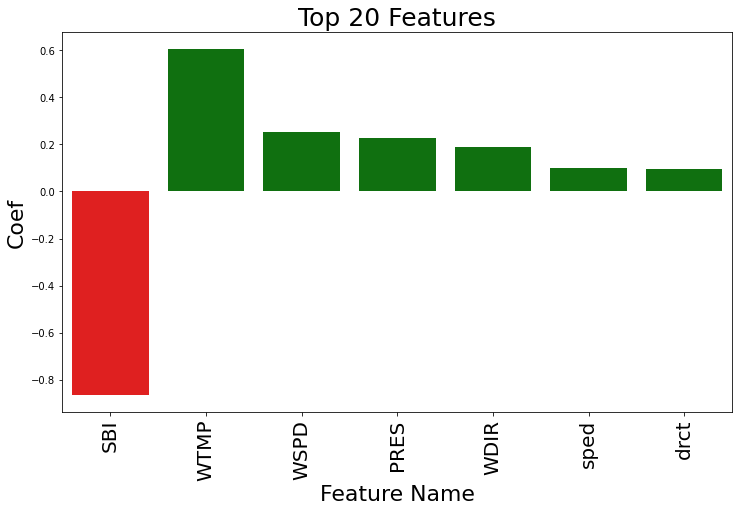

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.barplot(x="feature",
            y="value",
            data=df_coef.head(20),
           palette=df_coef.head(20)["colors"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=20)
ax.set_title("Top 20 Features", fontsize=25)
ax.set_ylabel("Coef", fontsize=22)
ax.set_xlabel("Feature Name", fontsize=22)

SBI has the largest absolute value coefficient. As the variables as scaled, this tells us that it may play a significant role in the overall model.

### Permutation Importance

In [ ]:
import numpy as np
from sklearn.inspection import permutation_importance
features = np.array(feature_names)
perm_importance = permutation_importance(pipeline.named_steps["model"], X_test, y_test, random_state=111)

Text(0.5, 0, 'Permutation Importance')

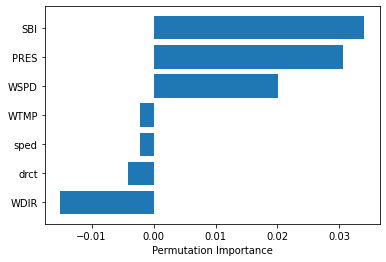

In [ ]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

The permutation importance is the decrease in a model score when a single feature value is randomly shuffled. SBI has the highest permutation importance, followed by PRES. This leads us to believe that these may be the most important features in this model. 

Future models could potentially remove the features with negative permutation importance to improve results. However, because they are only slighly negative, this may change with other random samples.